# Euler's constant approximation by Monte Carlo method

Léo Leroy and Siméon Tsang

## Motivations:

Our goal is to approximate Euler's constant using different Monte Carlo methods and compare their efficiency. This constant is defined as:

$\gamma = \lim_{n \to \infty} \left\{ \sum_{k=1}^{n} \frac{1}{k} - \log(n) \right\} = \sum_{k=1}^{\infty} [\frac{1}{k} - \log \left( 1 + \frac{1}{k} \right)]$

## Requirements 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Euler's constant true value (for comparison)
true_gamma = np.euler_gamma

## Question 1

Show that you can use importance sampling to derive unbiased estimates of γ. Hint: as a proposal, you may use for instance the distribution of $X = \lceil \frac{c}{ U^\alpha} \rceil, U \sim U[0, 1]$, for well-chosen constants $c$ and $α$. (Explain your choice.)



### Mathematical derivations

see overleaf: https://www.overleaf.com/project/67d03790885b591a8ca3498f

Importance sampling involves sampling from a proposal distribution $q(k)$ and reweighting the samples to estimate the expectation under the target distributions $p(k)$. Here, the target distribution corresponds to the terms in the infinite sum: $p(k) = \frac{1}{k} - \log(1+\frac{1}{k})$. However, the target distribution is not a probability distribution because it does not sum to $1$. Instead, we treat $p(k)$ as an integrand and use importance sampling to estimate the sum.

#### Proposal distribution: 

The hint suggests using the distribution of $X = \lceil \frac{c}{ U^\alpha} \rceil$ where $U \sim U[0, 1]$, and $c$ and $\alpha$ are constants to be chosen. The distribution samples larger values of $k$ more frequently, which is useful because the terms $\frac{1}{k} - \log(1+\frac{1}{k})$ decay slowly as $k$ increases. To determine $c$ and $\alpha$, consider the behavior of $p(k)$. For large $k$, $\log(1 + \frac{1}{k}) \approx \frac{1}{k} - \frac{1}{2k^2}$. This suggests that $p(k)$ decays like $\frac{1}{2k^2}$. To match this decay, we choose $\alpha = 1$, so that $X = \lceil \frac{c}{ U} \rceil$. The constant $c$ controls the range of $k$ values sampled.

#### Proposal distribution Probability Mass Function: 

The probability mass function (PMF) of X is: 
$q(k) = P(X = k) = P\left( \lceil \frac{c}{U} \rceil = k \right) = P\left( \frac{c}{k} \leq U < \frac{c}{k-1} \right)$
Since $U$ follows a uniform distribution, we can simplify: 
- For $k \geq 2$, $q(k) = \frac{c}{k-1} - \frac{c}{k} = \frac{c}{k(k-1)}$
- For $k = 1$, $q(1) = P(U \geq c) = 1 - c$


#### Importance sampling estimator: 

The importance sampling estimator for $\gamma$ is $\hat{\gamma} = \frac{1}{N} \sum_{i=1}^N \frac{p(X_i)}{q(X_i)}$ where $X_i$ are samples drawn from $q$ and $N$ is the number of samples. Substituting $p(k)$ and $q(k)$:


$\hat{\gamma} = \frac{1}{N} \sum_{i=1}^N \frac{\frac{1}{k_i} - \log\left(1 + \frac{1}{k_i}\right)}{\frac{c}{k_i(k_i-1)}}$

Simplifying: 

$\hat{\gamma} = \frac{1}{N} \sum_{i=1}^N \left( \frac{k_i(k_i-1)}{c} \left( \frac{1}{k_i} - \log\left(1 + \frac{1}{k_i}\right) \right) \right)$


#### Implementation:

Here is the algorithm to implement this estimator: 
1. Choose $c$ and $\alpha = 1$
2. Sample $U_i \sim U[0, 1]$ and compute $\lceil \frac{c}{ U_i^\alpha} \rceil$
3. Compute the importance weights $\frac{p(X_i)}{q(X_i)}$ as shown above
4. Average the weighted samples to estimate $\gamma$

### Code

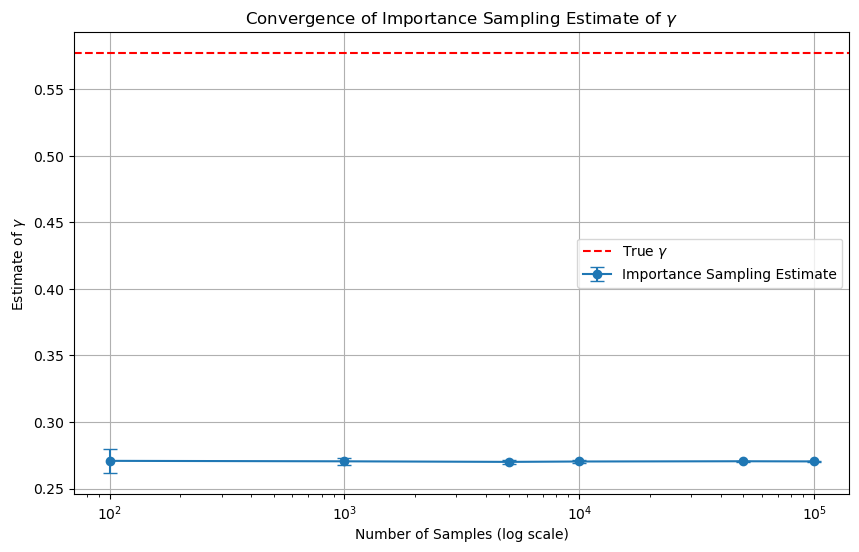

True value of γ: 0.5772156649015329
Sample size: 100, Estimate: 0.270783, Std Error: 0.009220
Sample size: 1000, Estimate: 0.270439, Std Error: 0.002738
Sample size: 5000, Estimate: 0.270011, Std Error: 0.001329
Sample size: 10000, Estimate: 0.270300, Std Error: 0.000864
Sample size: 50000, Estimate: 0.270486, Std Error: 0.000481
Sample size: 100000, Estimate: 0.270363, Std Error: 0.000294


In [5]:
# Parameters for the proposal distribution
c = 1.0  # Constant for the proposal distribution
alpha = 1.0  # Exponent for the proposal distribution

# Function to sample from the proposal distribution q(k)
def sample_from_q(c, alpha, size):
    U = np.random.uniform(0, 1, size)
    X = np.ceil(c / (U ** alpha))
    return X.astype(int)

# Function to compute p(k)
def p(k):
    return (1 / k) - np.log(1 + 1 / k)

# Function to compute q(k)
def q(k, c):
    return np.where(k == 1, 1 - c, c / (k * (k - 1)))

# Importance sampling estimator for gamma
def importance_sampling_estimate(c, alpha, num_samples):
    samples = sample_from_q(c, alpha, num_samples)
    weights = p(samples) / q(samples, c)
    return np.mean(weights)

# Experiment parameters
num_samples_list = [100, 1000, 5000, 10000, 50000, 100000]  # Number of samples to test
num_trials = 50  # Number of trials for each sample size to compute variance

# Store results
estimates = []
std_errors = []

# Run importance sampling for different sample sizes
for num_samples in num_samples_list:
    trial_estimates = []
    for _ in range(num_trials):
        gamma_estimate = importance_sampling_estimate(c, alpha, num_samples)
        trial_estimates.append(gamma_estimate)
    estimates.append(np.mean(trial_estimates))
    std_errors.append(np.std(trial_estimates))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.errorbar(num_samples_list, estimates, yerr=std_errors, fmt='o-', capsize=5, label='Importance Sampling Estimate')
plt.axhline(true_gamma, color='r', linestyle='--', label=r'True $\gamma$')  # Utilisation de r""
plt.xscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel(r'Estimate of $\gamma$')  # Utilisation de r""
plt.title(r'Convergence of Importance Sampling Estimate of $\gamma$')  # Utilisation de r""
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("True value of γ:", true_gamma)
for i, num_samples in enumerate(num_samples_list):
    print(f"Sample size: {num_samples}, Estimate: {estimates[i]:.6f}, Std Error: {std_errors[i]:.6f}")


### Interpretation

## Question 2 

This constant is also equal to the integral $\gamma = - \int_0^1 \log(-\log x) \, dx$. Show how you can use standard Monte Carlo, stratified Monte Carlo, and quasi-Monte Carlo to estimate $\gamma$, and represent visually the convergence rates of these different estimators.

### Mathematical derivations

### Code

<>:82: SyntaxWarning: invalid escape sequence '\g'
<>:87: SyntaxWarning: invalid escape sequence '\g'
<>:88: SyntaxWarning: invalid escape sequence '\g'
<>:82: SyntaxWarning: invalid escape sequence '\g'
<>:87: SyntaxWarning: invalid escape sequence '\g'
<>:88: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_9647/1527487043.py:82: SyntaxWarning: invalid escape sequence '\g'
  plt.axhline(true_gamma, color='r', linestyle='--', label='True $\gamma$')
/tmp/ipykernel_9647/1527487043.py:87: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel('Estimate of $\gamma$')
/tmp/ipykernel_9647/1527487043.py:88: SyntaxWarning: invalid escape sequence '\g'
  plt.title('Convergence of Monte Carlo Methods for Estimating $\gamma$')


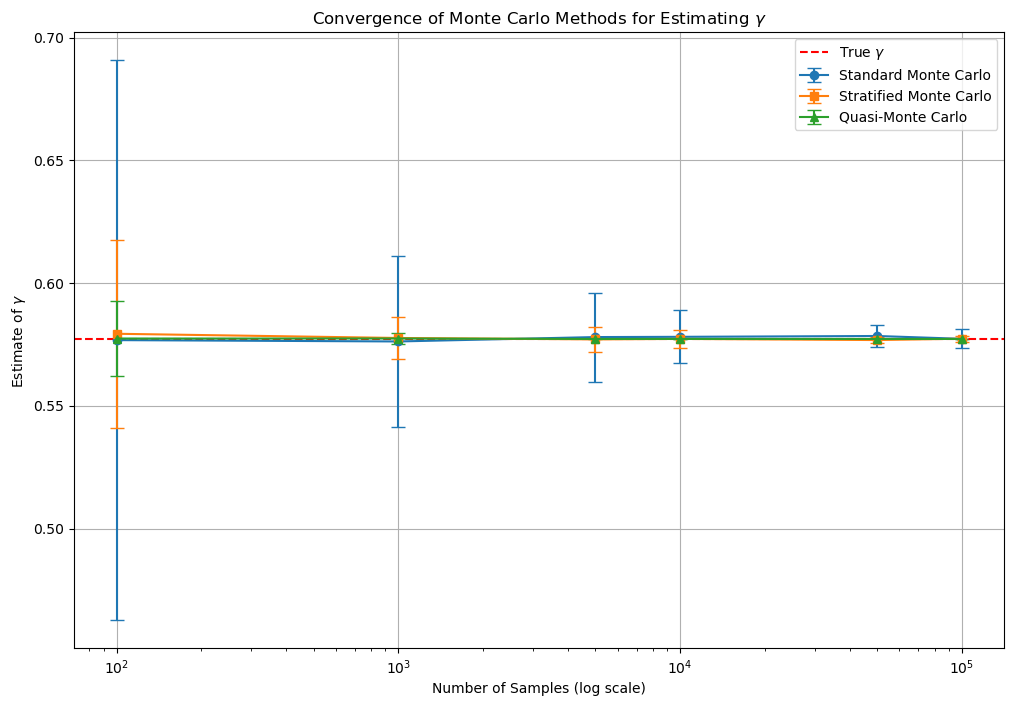

True value of γ: 0.5772156649015329
Sample size: 100
  Standard Monte Carlo: Estimate = 0.576749, Std Error = 0.114060
  Stratified Monte Carlo: Estimate = 0.579338, Std Error = 0.038201
  Quasi-Monte Carlo: Estimate = 0.577398, Std Error = 0.015299
Sample size: 1000
  Standard Monte Carlo: Estimate = 0.576204, Std Error = 0.034997
  Stratified Monte Carlo: Estimate = 0.577621, Std Error = 0.008672
  Quasi-Monte Carlo: Estimate = 0.577406, Std Error = 0.002148
Sample size: 5000
  Standard Monte Carlo: Estimate = 0.577993, Std Error = 0.018145
  Stratified Monte Carlo: Estimate = 0.577042, Std Error = 0.005151
  Quasi-Monte Carlo: Estimate = 0.577227, Std Error = 0.000221
Sample size: 10000
  Standard Monte Carlo: Estimate = 0.578091, Std Error = 0.010837
  Stratified Monte Carlo: Estimate = 0.577242, Std Error = 0.003698
  Quasi-Monte Carlo: Estimate = 0.577238, Std Error = 0.000162
Sample size: 50000
  Standard Monte Carlo: Estimate = 0.578432, Std Error = 0.004666
  Stratified Monte 

In [3]:

from scipy.stats import qmc  # For quasi-Monte Carlo

# True value of Euler's constant
true_gamma = np.euler_gamma

# Function to evaluate the integrand
def integrand(x):
    return -np.log(-np.log(x))

# Standard Monte Carlo
def standard_monte_carlo(num_samples):
    samples = np.random.uniform(0, 1, num_samples)
    return np.mean(integrand(samples))

# Stratified Monte Carlo
def stratified_monte_carlo(num_samples, num_strata):
    strata_size = num_samples // num_strata
    estimates = []
    for i in range(num_strata):
        # Sample uniformly within each stratum
        lower = i / num_strata
        upper = (i + 1) / num_strata
        samples = np.random.uniform(lower, upper, strata_size)
        estimates.append(np.mean(integrand(samples)))
    return np.mean(estimates)

# Quasi-Monte Carlo (using Sobol sequence)
def quasi_monte_carlo(num_samples):
    sampler = qmc.Sobol(d=1, scramble=True)
    samples = sampler.random_base2(m=int(np.log2(num_samples)))
    samples = samples.flatten()
    return np.mean(integrand(samples))

# Parameters for the experiment
num_samples_list = [100, 1000, 5000, 10000, 50000, 100000]  # Sample sizes to test
num_trials = 50  # Number of trials to compute variance

# Store results
results_standard = {'estimates': [], 'std_errors': []}
results_stratified = {'estimates': [], 'std_errors': []}
results_quasi = {'estimates': [], 'std_errors': []}

# Run experiments
for num_samples in num_samples_list:
    # Standard Monte Carlo
    standard_estimates = []
    for _ in range(num_trials):
        standard_estimates.append(standard_monte_carlo(num_samples))
    results_standard['estimates'].append(np.mean(standard_estimates))
    results_standard['std_errors'].append(np.std(standard_estimates))

    # Stratified Monte Carlo
    stratified_estimates = []
    for _ in range(num_trials):
        stratified_estimates.append(stratified_monte_carlo(num_samples, num_strata=10))
    results_stratified['estimates'].append(np.mean(stratified_estimates))
    results_stratified['std_errors'].append(np.std(stratified_estimates))

    # Quasi-Monte Carlo
    quasi_estimates = []
    for _ in range(num_trials):
        quasi_estimates.append(quasi_monte_carlo(num_samples))
    results_quasi['estimates'].append(np.mean(quasi_estimates))
    results_quasi['std_errors'].append(np.std(quasi_estimates))

# Plotting the results
plt.figure(figsize=(12, 8))

# Standard Monte Carlo
plt.errorbar(num_samples_list, results_standard['estimates'], yerr=results_standard['std_errors'],
             fmt='o-', capsize=5, label='Standard Monte Carlo')

# Stratified Monte Carlo
plt.errorbar(num_samples_list, results_stratified['estimates'], yerr=results_stratified['std_errors'],
             fmt='s-', capsize=5, label='Stratified Monte Carlo')

# Quasi-Monte Carlo
plt.errorbar(num_samples_list, results_quasi['estimates'], yerr=results_quasi['std_errors'],
             fmt='^-', capsize=5, label='Quasi-Monte Carlo')

# True value of gamma
plt.axhline(true_gamma, color='r', linestyle='--', label='True $\gamma$')

# Plot settings
plt.xscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Estimate of $\gamma$')
plt.title('Convergence of Monte Carlo Methods for Estimating $\gamma$')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("True value of γ:", true_gamma)
for i, num_samples in enumerate(num_samples_list):
    print(f"Sample size: {num_samples}")
    print(f"  Standard Monte Carlo: Estimate = {results_standard['estimates'][i]:.6f}, Std Error = {results_standard['std_errors'][i]:.6f}")
    print(f"  Stratified Monte Carlo: Estimate = {results_stratified['estimates'][i]:.6f}, Std Error = {results_stratified['std_errors'][i]:.6f}")
    print(f"  Quasi-Monte Carlo: Estimate = {results_quasi['estimates'][i]:.6f}, Std Error = {results_quasi['std_errors'][i]:.6f}")

## Question 3

Derive control variates for point 2; for instance, note that $\log(x) \approx x - 1$ for $x \to 1$, which suggests $\log(1 - U)$, where $U \sim \text{U}[0,1]$ as a potential control variates. Repeat
question 2 after you have chosen these control variates and their coefficients.

### Mathematical derivations

The idea is to reduce the variance of the Monte Carlo estimator by exploiting the correlation between the integrand and the control variate.

The control variate method involves introducing a correlated random variable $Z$ with known expectation $\mathbb{E}[Z]$. The estimator is adjusted as $\hat{\gamma}_{CV} = \hat{\gamma} - \beta (Z - \mathbb{E}[Z])$, where $\hat{\gamma}$ is the standard Monte Carlo estimator, $Z$ is the control variate,$\beta$ is a coefficient chosen to minimize the variance of  $\hat{\gamma}_{CV}$.

We choose $Z = \log(1 - U)$, where $U \sim \text{U}[0,1]$. The expectation of $Z$ is: $\mathbb{E}[Z] = \mathbb{E}[\log(1 - U)] = \int_0^1 \log(1 - u) \, du = -1$.

The optimal coefficient $\beta$ is given by $\beta = \frac{\operatorname{Cov}(\hat{\gamma}, Z)}{\operatorname{Var}(Z)}$.
In practice, we estimate $\beta$ from the samples with a linear regression.

So, the final form is $\hat{\gamma}_{CV} = \hat{\gamma} - \frac{\operatorname{Cov}(\hat{\gamma}, Z)}{\operatorname{Var}(Z)} (Z - 1)$.


### Code

<>:107: SyntaxWarning: invalid escape sequence '\g'
<>:112: SyntaxWarning: invalid escape sequence '\g'
<>:113: SyntaxWarning: invalid escape sequence '\g'
<>:107: SyntaxWarning: invalid escape sequence '\g'
<>:112: SyntaxWarning: invalid escape sequence '\g'
<>:113: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_9647/1307904602.py:107: SyntaxWarning: invalid escape sequence '\g'
  plt.axhline(true_gamma, color='r', linestyle='--', label='True $\gamma$')
/tmp/ipykernel_9647/1307904602.py:112: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel('Estimate of $\gamma$')
/tmp/ipykernel_9647/1307904602.py:113: SyntaxWarning: invalid escape sequence '\g'
  plt.title('Convergence of Monte Carlo Methods for Estimating $\gamma$')


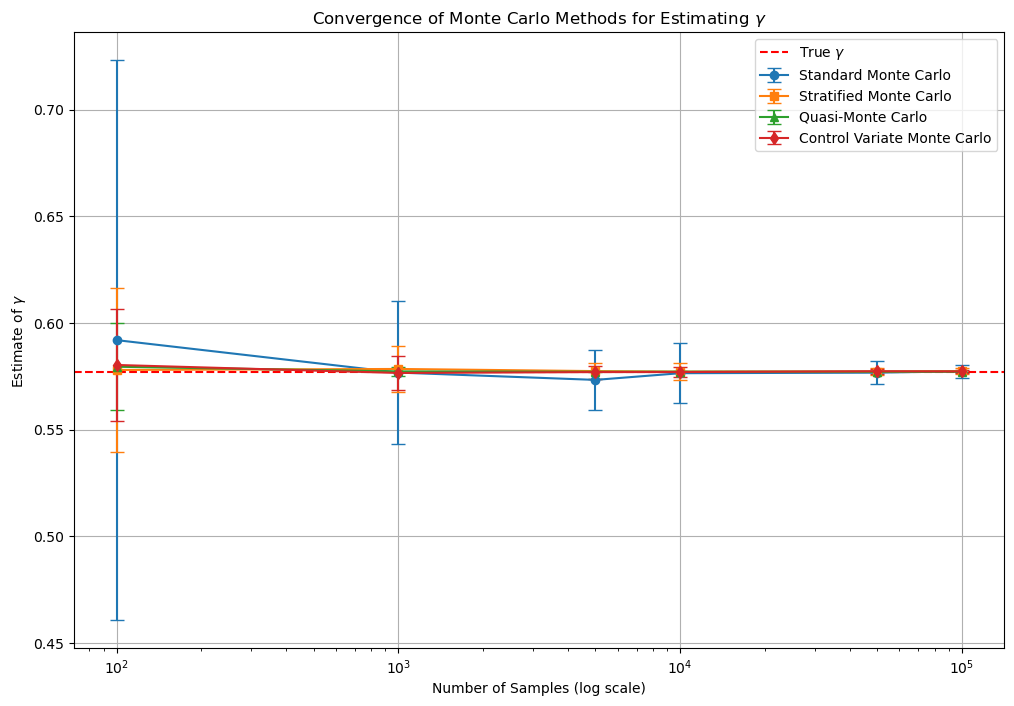

True value of γ: 0.5772156649015329
Sample size: 100
  Standard Monte Carlo: Estimate = 0.592010, Std Error = 0.131221
  Stratified Monte Carlo: Estimate = 0.578024, Std Error = 0.038545
  Quasi-Monte Carlo: Estimate = 0.579538, Std Error = 0.020323
  Control Variate Monte Carlo: Estimate = 0.580365, Std Error = 0.026453
Sample size: 1000
  Standard Monte Carlo: Estimate = 0.576797, Std Error = 0.033320
  Stratified Monte Carlo: Estimate = 0.578497, Std Error = 0.010682
  Quasi-Monte Carlo: Estimate = 0.577347, Std Error = 0.002022
  Control Variate Monte Carlo: Estimate = 0.576615, Std Error = 0.007967
Sample size: 5000
  Standard Monte Carlo: Estimate = 0.573373, Std Error = 0.014214
  Stratified Monte Carlo: Estimate = 0.577494, Std Error = 0.003908
  Quasi-Monte Carlo: Estimate = 0.577183, Std Error = 0.000225
  Control Variate Monte Carlo: Estimate = 0.577034, Std Error = 0.003077
Sample size: 10000
  Standard Monte Carlo: Estimate = 0.576506, Std Error = 0.014195
  Stratified Mon

In [6]:
# True value of Euler's constant
true_gamma = np.euler_gamma

# Function to evaluate the integrand
def integrand(x):
    return -np.log(-np.log(x))

# Standard Monte Carlo
def standard_monte_carlo(num_samples):
    samples = np.random.uniform(0, 1, num_samples)
    return np.mean(integrand(samples))

# Stratified Monte Carlo
def stratified_monte_carlo(num_samples, num_strata):
    strata_size = num_samples // num_strata
    estimates = []
    for i in range(num_strata):
        # Sample uniformly within each stratum
        lower = i / num_strata
        upper = (i + 1) / num_strata
        samples = np.random.uniform(lower, upper, strata_size)
        estimates.append(np.mean(integrand(samples)))
    return np.mean(estimates)

# Quasi-Monte Carlo (using Sobol sequence)
def quasi_monte_carlo(num_samples):
    sampler = qmc.Sobol(d=1, scramble=True)
    samples = sampler.random_base2(m=int(np.log2(num_samples)))
    samples = samples.flatten()
    return np.mean(integrand(samples))

# Control Variate Monte Carlo
def control_variate_monte_carlo(num_samples):
    U = np.random.uniform(0, 1, num_samples)
    Z = np.log(1 - U)  # Control variate
    Y = integrand(U)   # Integrand

    # Estimate the optimal coefficient c
    cov_Y_Z = np.cov(Y, Z)[0, 1]
    var_Z = np.var(Z)
    c = cov_Y_Z / var_Z

    # Control variate estimator
    gamma_hat = np.mean(Y) - c * (np.mean(Z) - (-1))  # E[Z] = -1
    return gamma_hat

# Parameters for the experiment
num_samples_list = [100, 1000, 5000, 10000, 50000, 100000]  # Sample sizes to test
num_trials = 50  # Number of trials to compute variance

# Store results
results_standard = {'estimates': [], 'std_errors': []}
results_stratified = {'estimates': [], 'std_errors': []}
results_quasi = {'estimates': [], 'std_errors': []}
results_control = {'estimates': [], 'std_errors': []}

# Run experiments
for num_samples in num_samples_list:
    # Standard Monte Carlo
    standard_estimates = []
    for _ in range(num_trials):
        standard_estimates.append(standard_monte_carlo(num_samples))
    results_standard['estimates'].append(np.mean(standard_estimates))
    results_standard['std_errors'].append(np.std(standard_estimates))

    # Stratified Monte Carlo
    stratified_estimates = []
    for _ in range(num_trials):
        stratified_estimates.append(stratified_monte_carlo(num_samples, num_strata=10))
    results_stratified['estimates'].append(np.mean(stratified_estimates))
    results_stratified['std_errors'].append(np.std(stratified_estimates))

    # Quasi-Monte Carlo
    quasi_estimates = []
    for _ in range(num_trials):
        quasi_estimates.append(quasi_monte_carlo(num_samples))
    results_quasi['estimates'].append(np.mean(quasi_estimates))
    results_quasi['std_errors'].append(np.std(quasi_estimates))

    # Control Variate Monte Carlo
    control_estimates = []
    for _ in range(num_trials):
        control_estimates.append(control_variate_monte_carlo(num_samples))
    results_control['estimates'].append(np.mean(control_estimates))
    results_control['std_errors'].append(np.std(control_estimates))

# Plotting the results
plt.figure(figsize=(12, 8))

# Standard Monte Carlo
plt.errorbar(num_samples_list, results_standard['estimates'], yerr=results_standard['std_errors'],
             fmt='o-', capsize=5, label='Standard Monte Carlo')

# Stratified Monte Carlo
plt.errorbar(num_samples_list, results_stratified['estimates'], yerr=results_stratified['std_errors'],
             fmt='s-', capsize=5, label='Stratified Monte Carlo')

# Quasi-Monte Carlo
plt.errorbar(num_samples_list, results_quasi['estimates'], yerr=results_quasi['std_errors'],
             fmt='^-', capsize=5, label='Quasi-Monte Carlo')

# Control Variate Monte Carlo
plt.errorbar(num_samples_list, results_control['estimates'], yerr=results_control['std_errors'],
             fmt='d-', capsize=5, label='Control Variate Monte Carlo')

# True value of gamma
plt.axhline(true_gamma, color='r', linestyle='--', label='True $\gamma$')

# Plot settings
plt.xscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Estimate of $\gamma$')
plt.title('Convergence of Monte Carlo Methods for Estimating $\gamma$')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("True value of γ:", true_gamma)
for i, num_samples in enumerate(num_samples_list):
    print(f"Sample size: {num_samples}")
    print(f"  Standard Monte Carlo: Estimate = {results_standard['estimates'][i]:.6f}, Std Error = {results_standard['std_errors'][i]:.6f}")
    print(f"  Stratified Monte Carlo: Estimate = {results_stratified['estimates'][i]:.6f}, Std Error = {results_stratified['std_errors'][i]:.6f}")
    print(f"  Quasi-Monte Carlo: Estimate = {results_quasi['estimates'][i]:.6f}, Std Error = {results_quasi['std_errors'][i]:.6f}")
    print(f"  Control Variate Monte Carlo: Estimate = {results_control['estimates'][i]:.6f}, Std Error = {results_control['std_errors'][i]:.6f}")

### Interpretations

## Question 4

A truncated sum estimator is of the form: $\sum_{k=0}^R \frac{a_k}{P(R \geq k)}$
where R is an integer-valued random variable. Show that such an estimator has
expectation $\sum_{k=0}^\infty a_k$ (assuming this infinite sum converges), and use it to estimate
unbiasedly $\gamma$ (using its first definition above). Explain in particular how you may
choose the distribution of R (for instance to make the variance finite and small).

### Mathematical derivations

#### Truncated sum estimator

The truncated sum estimator is a powerful tool for estimating infinite series. Given a sequence $\{a_k\}_k$ and an integer-valued random variable $R$, the estimator is defined as $\hat{S} = \sum_{k=0}^R \frac{a_k}{P(R \geq k)}$. We will show that this estimator is unbiased for the infinite sum $S = \sum_{k=0}^\infty a_k$ (assuming convergence), and then use it to estimate Euler's constant $\gamma$, for which we recall the definition: $\gamma = \lim_{n \to \infty} \left( \sum_{k=1}^n \frac{1}{k} - \log(n) \right)$

#### Unbiasedness of the truncated sum estimator 

The expectation of the truncated sum estimator is $E[\hat{S}] = E\left[ \sum_{k=0}^R \frac{a_k}{P(R \geq k)} \right]$

We can write: $E[\hat{S}] = \sum_{r=0}^\infty P(R = r) \sum_{k=0}^r \frac{a_k}{P(R \geq k)}$

Rearranging the sums: $E[\hat{S}] = \sum_{k=0}^\infty a_k \sum_{r=k}^\infty \frac{P(R = r)}{P(R \geq k)}$

Since $P(R \geq k) = \sum_{r=k}^\infty P(R = r)$, the inner sum simplifies to: $\sum_{r=k}^\infty \frac{P(R = r)}{P(R \geq k)} = 1$.

Thus: $E[\hat{S}] = \sum_{k=0}^\infty a_k$

This shows that the truncated sum estimator is unbiased for the infinite sum $S = \sum_{k=0}^\infty a_k$.


### Code

<>:39: SyntaxWarning: invalid escape sequence '\g'
<>:41: SyntaxWarning: invalid escape sequence '\g'
<>:42: SyntaxWarning: invalid escape sequence '\g'
<>:39: SyntaxWarning: invalid escape sequence '\g'
<>:41: SyntaxWarning: invalid escape sequence '\g'
<>:42: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_9647/1121047698.py:39: SyntaxWarning: invalid escape sequence '\g'
  plt.axhline(true_gamma, color='r', linestyle='--', label='True $\gamma$')
/tmp/ipykernel_9647/1121047698.py:41: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel('Estimate of $\gamma$')
/tmp/ipykernel_9647/1121047698.py:42: SyntaxWarning: invalid escape sequence '\g'
  plt.title('Truncated Sum Estimator for $\gamma$ with Geometric Distribution')


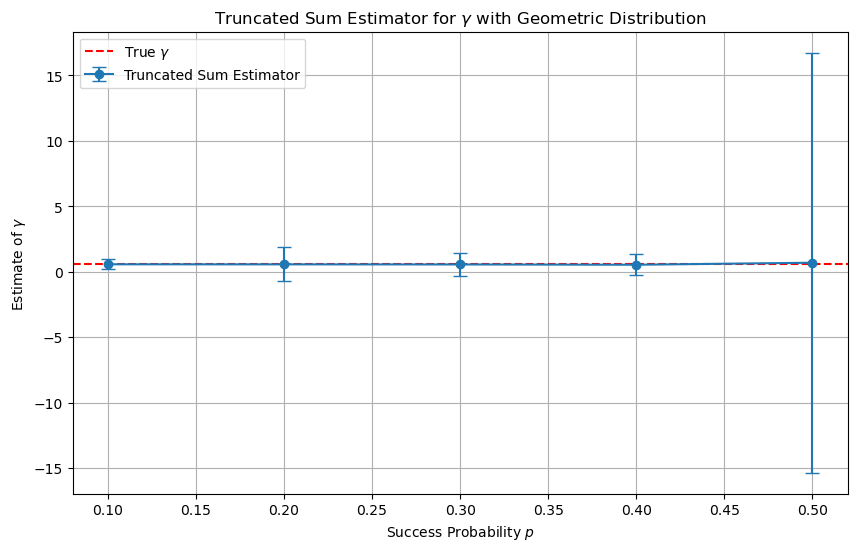

True value of γ: 0.5772156649015329
p = 0.10, Estimate = 0.579911, Std Error = 0.384454
p = 0.20, Estimate = 0.576244, Std Error = 1.304387
p = 0.30, Estimate = 0.569076, Std Error = 0.886892
p = 0.40, Estimate = 0.545594, Std Error = 0.804487
p = 0.50, Estimate = 0.699729, Std Error = 16.032889


In [7]:
# True value of Euler's constant
true_gamma = np.euler_gamma

# Function to compute a_k
def a_k(k):
    return (1 / k) - np.log(1 + 1 / k)

# Truncated sum estimator for gamma
def truncated_sum_estimator(p, num_samples):
    estimates = []
    for _ in range(num_samples):
        # Sample R from a geometric distribution
        R = np.random.geometric(p) - 1  # Subtract 1 to start from k=1
        # Compute the truncated sum
        gamma_hat = 0
        for k in range(1, R + 1):
            gamma_hat += a_k(k) / ((1 - p) ** k)
        estimates.append(gamma_hat)
    return np.mean(estimates), np.std(estimates)

# Parameters for the experiment
p_values = [0.1, 0.2, 0.3, 0.4, 0.5]  # Success probabilities for geometric distribution
num_samples = 10000  # Number of samples for each p

# Store results
results = {'p': [], 'estimates': [], 'std_errors': []}

# Run experiments
for p in p_values:
    mean_estimate, std_error = truncated_sum_estimator(p, num_samples)
    results['p'].append(p)
    results['estimates'].append(mean_estimate)
    results['std_errors'].append(std_error)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.errorbar(results['p'], results['estimates'], yerr=results['std_errors'],
             fmt='o-', capsize=5, label='Truncated Sum Estimator')
plt.axhline(true_gamma, color='r', linestyle='--', label='True $\gamma$')
plt.xlabel('Success Probability $p$')
plt.ylabel('Estimate of $\gamma$')
plt.title('Truncated Sum Estimator for $\gamma$ with Geometric Distribution')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("True value of γ:", true_gamma)
for i, p in enumerate(results['p']):
    print(f"p = {p:.2f}, Estimate = {results['estimates'][i]:.6f}, Std Error = {results['std_errors'][i]:.6f}")

### Interpretations
